# Effects of Basis Set Size: The Molecular Case


In exercise 2.4, you have already computed the equilibrium energy of
H$_2$ at the Hartree-Fock level using the 6-31G basis set. You will now
be employing the slightly larger 6-311G basis, as well as Dunning's
correlation-consistent aug-cc-pVTZ basis. Correlation-consistent basis
sets were defined such that systematic improvement over total energies
and molecular properties is possible. 

First again we again import the required modules:

In [3]:
import psi4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-poster', 'seaborn-ticks'])


then we set the maximum ressources that can be used

In [4]:
psi4.set_memory('2 GB')
psi4.set_num_threads(4)

next we define our $H_2$ geometry that we already used last week setting the H molecules at equilibrium distance of each other. 

In [5]:
h2 = psi4.geometry("""
0 1
H 0.0 0.0 0.0
H 0.0 0.0 0.7414
""")


In [6]:
basissets = ['6-31G', '6-311G', 'aug-cc-pvtz'] # these are the basis sets we are going to use

psi4.set_options({'reference':'UHF'}) # We are using Unrestriced Hartee Fock

for basis in basissets:
    psi4.core.set_output_file(f'{basis}-output.log', False) # save in seperate log files
    # you can concatenate strings e.g using 'method/'+basis, to select the molecule explicitly you can use the molecule=h2
    E = None #call psi4  single point energy calculation here once per basis set

    print(basis, E)

6-31G None
6-311G None
aug-cc-pvtz None


```{admonition} Exercise 1
:class: exercise
Include a table of the the calculated energies using the three different basis sets
```

Lets have a look at one of the outputs (e.g for the `6-31G` basis). We can use the shell command `!grep -options SEARCHTERM FILENAME` for this. (The `!` denotes that this is not a python command but a bash program. 

As the SCF procedure is iterative we can search for the word `iter` in the output. By including `-A 1 -B 3` we get 1 line after the last find and 3 lines before the first find, which contain some helpful context to make sense of the results. 

In [5]:
!grep -A 1 -B 3 iter 6-31G-output.log


                           Total Energy        Delta E     RMS |[F,P]|

   @DF-UHF iter SAD:    -0.85212229561043   -8.52122e-01   0.00000e+00 
   @DF-UHF iter   1:    -1.12493424123817   -2.72812e-01   1.62339e-02 DIIS
   @DF-UHF iter   2:    -1.12669596352818   -1.76172e-03   2.38980e-03 DIIS
   @DF-UHF iter   3:    -1.12673509439905   -3.91309e-05   3.36383e-06 DIIS
   @DF-UHF iter   4:    -1.12673509447663   -7.75799e-11   2.74379e-09 DIIS
  Energy and wave function converged.


```{admonition} Exercise 2
:class: exercise
What is the meaning of the Delta E column? What is DIIS? 
```

Next, let's plot the SCF convergence for the three tested basis sets. You can use a little helper function which will read in the table shown above and return it to you as pandas dataframe that you can easily plot. 

For the plotting we will use matplotlib. 

In [8]:
from helpers import psi4_read_scf

In [12]:
# read in scf table like so:

# nameOfDataFrame = psi4_read_scf('nameOfOutputFile.log')

# to view the table you can simply type the name of the DataFrame

# nameOfDataFrame

Matplotlib is an easy and convenient plotting library. You can complete the figure plot below or you can also export the Dataframe for Excel or other programs `NameOfDataFrame.to_csv('basis.csv', index=False)`

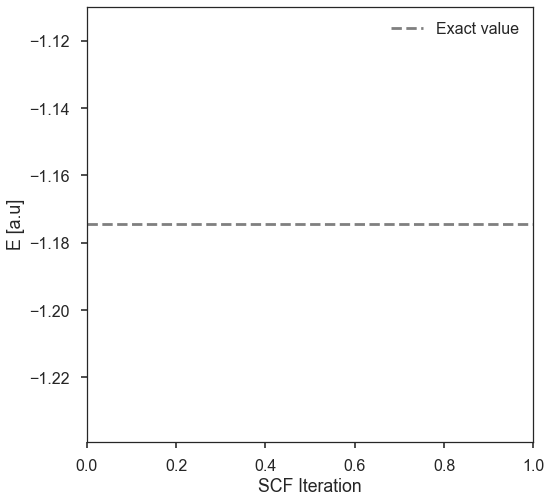

In [13]:
fig, ax = plt.subplots(1, figsize=(8,8)) # create figure

#ax.plot(nameOfDataFrame.index, nameOfDataFrame['Total Energy'], label='label')  # we use the table index and the Total Energy column for plotting

#plot horizontal line with exact value
ax.axhline(-1.174474, label='Exact value', linestyle='--', color='gray') # horizontal line for the exact energy

ax.set_xlabel('SCF Iteration') # set axis labels
ax.set_ylabel('E [a.u]')
ax.legend() # show legend
plt.show()

```{admonition} Exercise 3
:class: exercise
How does the basis set size influence the SCF convergence behaviour?
```

```{admonition} Exercise 4
:class: exercise
Use your knowledge on the Hartree-Fock SCF procedure and the
    PSI4 output to derive a flow chart of how a wavefunction
    optimisation is carried out. Use $\Psi_{guess}$ for the first trial
    wavefunction (`SCF Guess` in the PSI4 output), $\Psi_{opt}$ for the
    optimised wavefunction (`@DF-UHF Final Energy:  ` in the Gaussian output) and think
    of appropriate naming schemes for the intermediate steps. Clarify
    whether, during an iteration, the Fock operator acts on the previous
    $\Psi$ or on the new one. Include checks for convergence at the
    appropriate points.
```